#  **Практическое занятие №5. Введение в нейронные сети.**

## Знакомство с **PyTorch**
See https://pytorch.org/tutorials

In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt

### Tensors

Массивы в PyTorch

See https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

In [2]:
# simple creation
t = torch.tensor([[1, 2], [3, 4]])
t

tensor([[1, 2],
        [3, 4]])

In [3]:
# to numpy
n = t.numpy()
n

array([[1, 2],
       [3, 4]], dtype=int64)

In [4]:
# from numpy
t = torch.from_numpy(n)
t

tensor([[1, 2],
        [3, 4]])

In [5]:
# tensors and ndarrays share memory
t = torch.arange(5)
n = t.numpy()

n[0] = 100

t

tensor([100,   1,   2,   3,   4])

### Autograd

Автоматическое дифференцирование

See https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

In [6]:
# manual gradient for mse loss in linear regression
def grad(w, X, y):
    return (2 * X.T @ (X @ w - y)) / len(X)

X = np.random.rand(5, 2)
y = np.random.rand(5)
w = np.array([1., 2.])

grad(w, X, y)

array([1.40512008, 0.74748642])

In [7]:
# torch gradient
X = torch.from_numpy(X).to(dtype=torch.float)
y = torch.from_numpy(y).to(dtype=torch.float)
w = torch.tensor([1., 2.], requires_grad=True)

l = torch.nn.functional.mse_loss(X @ w, y)
l.backward()

w.grad

tensor([1.4051, 0.7475])

### Datasets and Dataloaders

See https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

#### MNIST dataset

See https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST

In [8]:
from torchvision import datasets

mnist = datasets.MNIST(root='mnist', download=True)

mnist

1.0%

100.0%


Extracting mnist\MNIST\raw\train-images-idx3-ubyte.gz to mnist\MNIST\raw



100.0%

Extracting mnist\MNIST\raw\train-labels-idx1-ubyte.gz to mnist\MNIST\raw



100.0%


Extracting mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to mnist\MNIST\raw



100.0%

Extracting mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to mnist\MNIST\raw


Dataset MNIST
    Number of datapoints: 60000
    Root location: mnist
    Split: Train

In [5]:
# mnist[10]

import torch
import torchvision

# print(torch.backends.cudnn.allow_tf32)
# print(torch.backends.cudnn.benchmark)
print(torch.backends.cudnn.is_available())
print(torch.backends.cudnn.enabled)

True
False
True
True


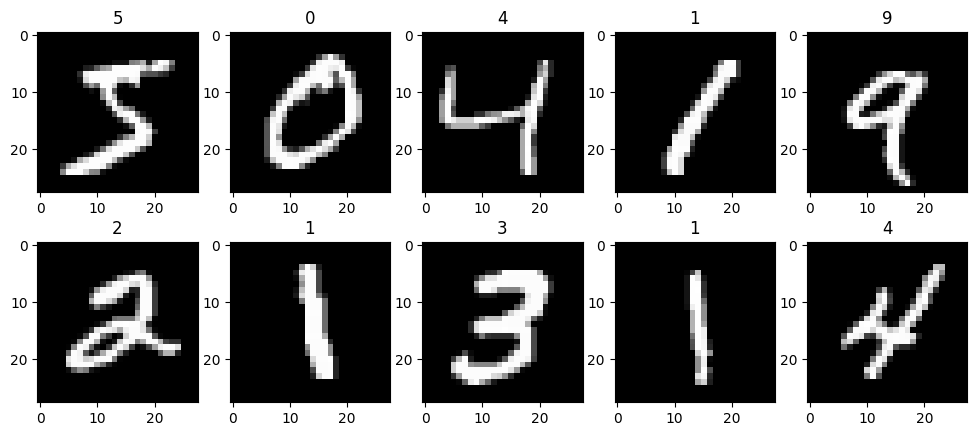

In [10]:
plt.figure(figsize=(12,5))

for i in range(10):
    x, y = mnist[i]
    plt.subplot(2, 5, i + 1)
    plt.title(f'{y}')
    plt.imshow(x, cmap='gray')

plt.show()

#### Custom dataset

In [11]:
from torch.utils.data import Dataset

class RandomDataset(Dataset):
    def __init__(self, n_objects, n_features):
        # your code here
        self.X = torch.rand(n_objects, n_features)
        self.y = torch.rand(n_objects)

    def __len__(self):
        # your code here
        return len(self.X)

    def __getitem__(self, idx):
        # your code here
        return self.X[idx], self.y[idx]

In [12]:
data = RandomDataset(100, 5)

x, y = data[0]

print(f'x = {x}')
print(f'y = {y}')

x = tensor([0.2876, 0.5298, 0.2686, 0.9485, 0.1660])
y = 0.2655894160270691


#### Dataloader

In [13]:
from torch.utils.data import DataLoader

dataloader = DataLoader(data, batch_size=50, shuffle=True)

for i, (X, y) in enumerate(dataloader):
    print(f'Batch {i}')
    print(f'X.shape = {X.shape}')
    print(f'y.shape = {y.shape}')

Batch 0
X.shape = torch.Size([50, 5])
y.shape = torch.Size([50])
Batch 1
X.shape = torch.Size([50, 5])
y.shape = torch.Size([50])


### Neural Networks

#### Генерируем датасет

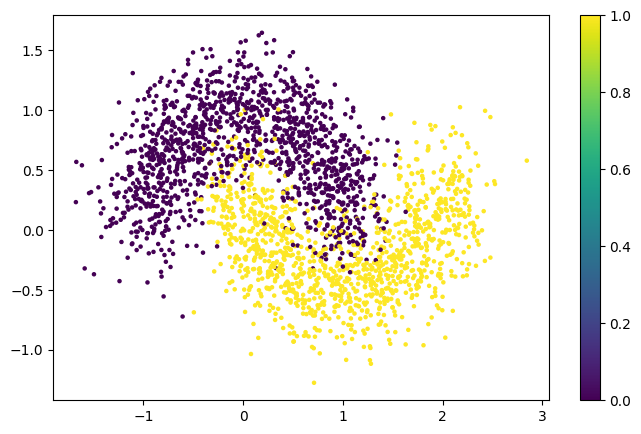

In [17]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset

X, y = make_moons(10000, noise=0.25, random_state=12)

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = torch.from_numpy(X_train).to(dtype=torch.float)
y_train = torch.from_numpy(y_train).to(dtype=torch.float)
X_test = torch.from_numpy(X_test).to(dtype=torch.float)
y_test = torch.from_numpy(y_test).to(dtype=torch.float)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

plt.figure(figsize=(8,5))

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=5)
plt.colorbar()

plt.show()

**Вопрос:** Почему нам не хватит линейной модели для решения задачи?

#### Собираем модель

See https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html \
See https://pytorch.org/docs/stable/nn.html

In [18]:
from torch import nn

# your code here
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=1),
    nn.Sigmoid(),
    nn.Flatten(start_dim=0)
)

model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
  (6): Flatten(start_dim=0, end_dim=-1)
)

In [19]:
# model should predict in [0,1)
with torch.no_grad():
    x, y = train_dataset[0]
    print(f'x = {x}')
    print(f'y_true = {y}')
    print(f'y_pred = {model(x).item()}')

x = tensor([-0.7998,  0.5274])
y_true = 0.0
y_pred = 0.5012688636779785


**Вопрос:** Сколько всего параметров в модели? Почему столько?

In [20]:
# check model parameters
params_count = 0
for param in model.parameters():
    params_count += torch.numel(param)
params_count

151

#### Обучаем модель

See https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

##### Выбираем лосс функцию
See https://pytorch.org/docs/stable/nn.html#loss-functions

In [21]:
# your code here
loss_function = nn.BCELoss()

##### Выбираем оптимизатор

In [22]:
from torch import optim

# your code here
optimizer = optim.SGD(model.parameters(), lr=1e-1)

##### Запускаем тренировочный цикл

In [23]:
def run(model, dataloader, loss_function, optimizer=None):
    # set the model to evaluation or training mode
    if optimizer == None:
        model.eval()
    else:
        model.train()

    total_loss = 0

    for X, y in dataloader:
        # compute prediction
        pred = model(X)
        # compute loss
        loss = loss_function(pred, y)
        # save loss
        total_loss += loss.item()
        if optimizer != None:
            # compute gradients
            loss.backward()
            # do optimizer step
            optimizer.step()
            # clear gradients
            optimizer.zero_grad()

    return total_loss / len(dataloader)

In [24]:
from IPython.display import clear_output

def show_losses(train_loss_hist, test_loss_hist):
    clear_output()

    plt.figure(figsize=(12,4))

    plt.subplot(1, 2, 1)
    plt.title('Train Loss')
    plt.plot(np.arange(len(train_loss_hist)), train_loss_hist)
    plt.yscale('log')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.title('Test Loss')
    plt.plot(np.arange(len(test_loss_hist)), test_loss_hist)
    plt.yscale('log')
    plt.grid()

    plt.show()

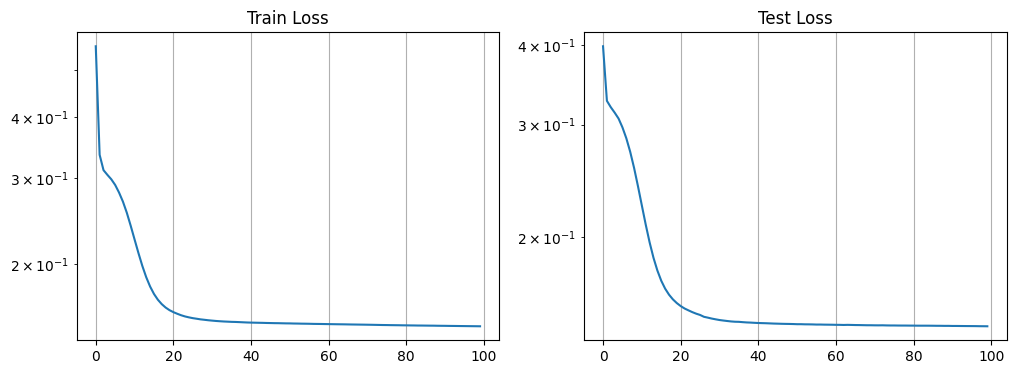

In [25]:
BATCH_SIZE = 100
NUM_EPOCHS = 100

# your code here
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

train_loss_hist = []
test_loss_hist = []

for i in range(NUM_EPOCHS):
    train_loss = run(model, train_loader, loss_function, optimizer)
    train_loss_hist.append(train_loss)
    test_loss = run(model, test_loader, loss_function)
    test_loss_hist.append(test_loss)

    if i % 10 == 9:
        show_losses(train_loss_hist, test_loss_hist)

#### Смотрим результаты

In [28]:
def make_levels(x_grid, y_grid, func, num_levels=10):
    X, Y = torch.meshgrid(x_grid, y_grid)
    Z = torch.empty_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = func(torch.tensor([X[i, j], Y[i, j]]))
    levels = torch.linspace(torch.min(Z), torch.max(Z), steps=num_levels)
    return X, Y, Z, levels

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


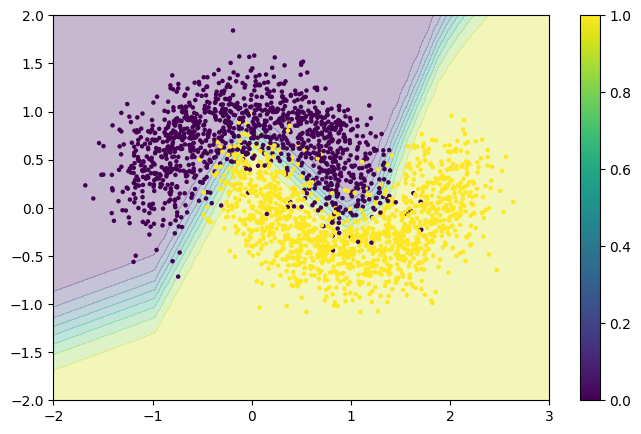

In [29]:
model.eval()

plt.figure(figsize=(8,5))

levels = make_levels(torch.linspace(-2, 3, 50), torch.linspace(-2, 2, 50), lambda x: model(x).item())

plt.contourf(*levels, alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=5)
plt.colorbar()

plt.show()

## Дополнительные замечания

### MNIST - многоклассовая классификация

Возможно, пригодится *one-hot encoding*

See https://pytorch.org/docs/stable/generated/torch.nn.functional.one_hot.html

Лосс-функция `BCELoss` не подойдет, стоит поискать подходящую

See https://pytorch.org/docs/stable/nn.html#loss-functions

### Объекты MNIST - картинки (PIL.Image)

Стоит обратить внимание на параметр transform датасета MNIST - с его помощью сразу преобразовать объекты выборки

See https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST \
See https://pytorch.org/vision/master/generated/torchvision.transforms.ToTensor.html

Объекты MNIST двумерные, стоит это учесть при разработке архитектуры модели

See https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html

### Борба с переобучением

Возможно, пригодятся модули `nn.Dropout` и `nn.BatchNorm`

See https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html \
See https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html